In [311]:
import os
os.chdir(r"C:\Users\antoi\OneDrive\CENTRALE\3A\Mention - Design & System Sciences\SM10 - Séquence Mention 1\DDDA - Data-Driven Design Analysis\TD1_ACP")
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [312]:
print(pd.__version__)

1.2.0


In [313]:
X = pd.read_excel("./excel_data/dashboard_data.xlsx",sheet_name=0,header=0,index_col=0)
print(X.shape)

(110, 19)


In [314]:
print(X.head())

               Speedometer Dial position Display lay-out  \
Dashboards                                                 
AUDI A2            behind steering wheel        analogue   
CITROEN C2         behind steering wheel         digital   
FIAT Idea                  at the center        analogue   
LANCIA Ypsilon             at the center        analogue   
NISSAN Micra       behind steering wheel        analogue   

               Air conditioner control Air vent shape Dashboard color  \
Dashboards                                                              
AUDI A2                         button         square   signle colour   
CITROEN C2                       other        rounded   signle colour   
FIAT Idea                        other         square     two colours   
LANCIA Ypsilon                   other         square     two colours   
NISSAN Micra                    button        rounded   signle colour   

               Aerator Shape Arrangement space   Style lay-out  \
D

In [315]:
print(X.columns)
X = X.drop(['Speedometer Dial position', 'Display lay-out', 'Air conditioner control', 'Air vent shape', 'Dashboard color', 'Aerator Shape', 'Arrangement space', 'Style lay-out'], axis=1)

Index(['Speedometer Dial position', 'Display lay-out',
       'Air conditioner control', 'Air vent shape', 'Dashboard color',
       'Aerator Shape', 'Arrangement space', 'Style lay-out',
       'Space organization', 'Control comprehensibility', 'Aerator lay-out',
       'Arrangement space perception', 'Comfort', 'Simplicity',
       'Sportive lay-out', 'Masculinity', 'Quality', 'Novelty', 'Harmony'],
      dtype='object')


In [143]:
X = X.groupby(X.index).mean()
print(X)

                Space organization  Control comprehensibility  \
Dashboards                                                      
AUDI A2                   1.098022                   0.774539   
CITROEN C2                1.335250                   0.840702   
FIAT Idea                 1.012041                   1.173869   
LANCIA Ypsilon            0.819234                   0.776180   
NISSAN Micra              0.958000                   1.154925   
PEUGEOT 206               0.948769                   1.023463   
RENAULT Clio              0.989069                   1.560215   
RENAULT Modus             0.592262                   1.096703   
TOYOTA Yaris              1.124899                   0.935380   
VW Polo                   1.299081                   0.674480   

                Aerator lay-out  Arrangement space perception   Comfort  \
Dashboards                                                                
AUDI A2                0.928176                      1.457170  0.8162

In [316]:
p=X.shape[1]
n = X.shape[0]
print(n,p)

110 11


In [317]:
print(X.columns)

Index(['Space organization', 'Control comprehensibility', 'Aerator lay-out',
       'Arrangement space perception', 'Comfort', 'Simplicity',
       'Sportive lay-out', 'Masculinity', 'Quality', 'Novelty', 'Harmony'],
      dtype='object')


In [318]:
sc = StandardScaler()
Z = sc.fit_transform(X)
print(Z)

[[-1.06426672  1.0907492  -0.22841642 ...  1.22454456 -0.61630076
  -0.03387098]
 [ 5.05510074 -0.46683318 -0.41139976 ... -1.17437316 -0.86714974
  -0.99914251]
 [-0.47521147 -0.21771742  0.25946688 ... -0.81286967  0.13499506
  -0.55441577]
 ...
 [-0.99468363 -0.39382816  2.82092276 ...  0.25895862  1.00007509
  -1.13310752]
 [-0.35449617  0.74194941 -1.47439356 ... -0.80662409 -0.79844809
  -0.43844094]
 [ 0.59696574 -0.50176911 -0.57556423 ... -0.78850943 -1.13157545
  -0.86016944]]


### on vérifie la distribution normale (0,1)


In [319]:
#moyenne
print(np.mean(Z, axis=0))
#écart type
print(np.std(Z, axis=0))

[ 1.15059477e-16 -1.66533454e-16  2.03877319e-16 -1.29189588e-16
  2.01858732e-16 -2.22044605e-17  3.33319231e-16  2.50304827e-16
 -3.03797391e-16 -9.68921912e-17 -1.00929366e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [320]:
acp = PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [321]:
coord = acp.fit_transform(Z)
print(acp.n_components_)

11


In [322]:
print(acp.singular_values_**2/n)
print((n-1)/n*acp.explained_variance_)

[2.10051117e+00 1.58295233e+00 1.50960116e+00 1.22587055e+00
 1.00606512e+00 9.41616916e-01 8.08854453e-01 6.50146937e-01
 6.00306091e-01 5.74075273e-01 8.54987188e-31]
[2.10051117e+00 1.58295233e+00 1.50960116e+00 1.22587055e+00
 1.00606512e+00 9.41616916e-01 8.08854453e-01 6.50146937e-01
 6.00306091e-01 5.74075273e-01 8.54987188e-31]


In [323]:
print(acp.explained_variance_ratio_)

[1.90955561e-01 1.43904757e-01 1.37236469e-01 1.11442777e-01
 9.14604658e-02 8.56015378e-02 7.35322230e-02 5.91042670e-02
 5.45732810e-02 5.21886612e-02 7.77261080e-32]


### Plot eigenvalues

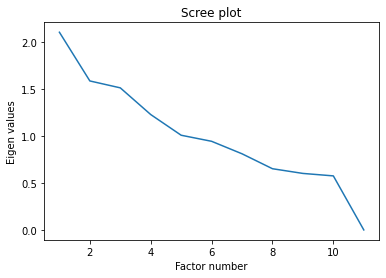

In [324]:
eigenvalues = (n-1)/n*acp.explained_variance_
plt.plot(np.arange(1,p+1),eigenvalues)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

### Plot contribution à l'information

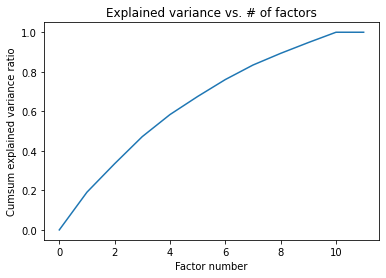

In [325]:
plt.plot(np.arange(0,p+1),np.concatenate([[0],np.cumsum(acp.explained_variance_ratio_)]))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")

plt.show()

### seuils pour tests des bâtons brisés

In [326]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

df = pd.DataFrame({'eigenvalues':eigenvalues,'seuils':bs,'valid':eigenvalues>bs})
print(df)

     eigenvalues    seuils  valid
0   2.100511e+00  3.019877  False
1   1.582952e+00  2.019877  False
2   1.509601e+00  1.519877  False
3   1.225871e+00  1.186544   True
4   1.006065e+00  0.936544   True
5   9.416169e-01  0.736544   True
6   8.088545e-01  0.569877   True
7   6.501469e-01  0.427020   True
8   6.003061e-01  0.302020   True
9   5.740753e-01  0.190909   True
10  8.549872e-31  0.090909  False


In [342]:
#convert coord to pandasDF and give it X index (car names)
coordDf = pd.DataFrame(coord)
coordDf['new_index']=(X.index)
coordDf.set_index(coordDf.new_index, inplace=True)
coordDf.drop(['new_index'], axis=1, inplace=True)
print(coordDf)
#groupby the dataframes by car name
CoordGrouped = coordDf.groupby(coordDf.index).mean()
XGrouped = X.groupby(X.index).mean()

#convert back coord to numpy array
CoordGrouped.set_index(np.arange(0,10,1),inplace=True)
CoordGrouped = CoordGrouped.to_numpy()

print(CoordGrouped, XGrouped)
print(len(CoordGrouped), XGrouped.shape)

                      0         1         2         3         4         5   \
new_index                                                                    
AUDI A2        -0.467997  0.667041 -0.082947  1.368587 -0.670848 -0.718650   
CITROEN C2      2.863264 -2.429031 -1.097252 -0.681007  2.370772  2.961099   
FIAT Idea       0.464138 -0.140127  0.954631 -1.313978 -1.025203 -0.480794   
LANCIA Ypsilon -0.140788  0.864866  1.734276 -2.929537 -0.143779 -1.939500   
NISSAN Micra   -1.458383  1.080580 -0.668448  1.236099  0.279135  0.708223   
...                  ...       ...       ...       ...       ...       ...   
PEUGEOT 206     1.626024  1.791756 -0.808087 -1.669839  0.821445 -1.234519   
RENAULT Clio    2.106861 -0.766846 -0.763592  1.354947  0.949784  0.569676   
RENAULT Modus   0.233422  1.695560 -2.066216 -2.315147 -0.909148 -0.571157   
TOYOTA Yaris    0.885434 -1.264520 -0.884628  2.048771 -0.782067 -0.592959   
VW Polo         0.967295 -2.652130  1.684844  1.046702  0.971518

In [212]:
print(n)

110


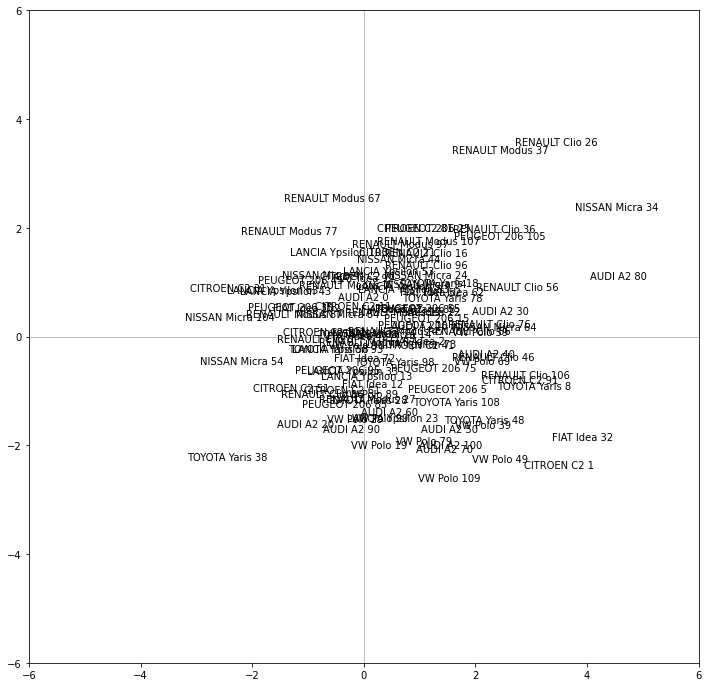

In [345]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
for i in range(n):
    plt.annotate(X.index[i] + ' ' + str(i),(coord[i,0],coord[i,1]))

#axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

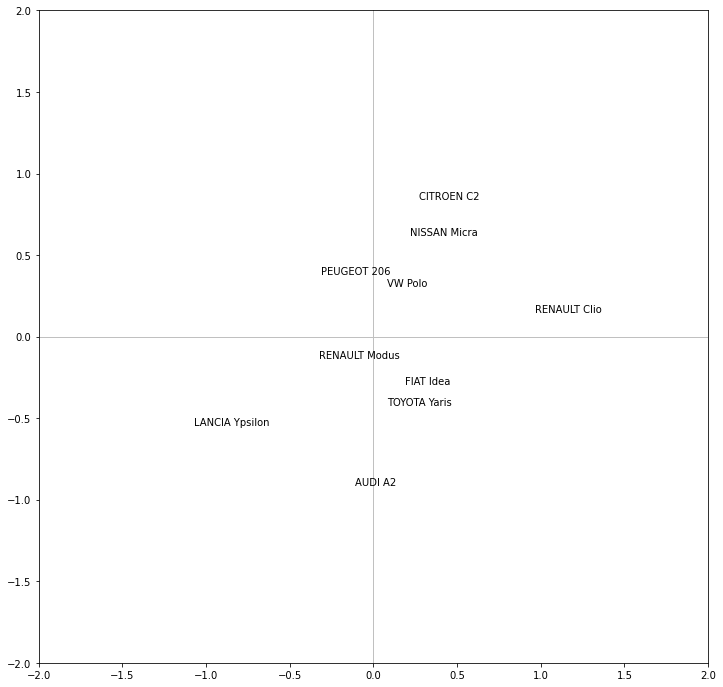

In [245]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-2,2)
axes.set_ylim(-2,2)
for i in range(10):
    plt.annotate(XGrouped.index[i],(CoordGrouped[i,3],CoordGrouped[i,4]))

#axes
plt.plot([-2,2],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,2],color='silver',linestyle='-',linewidth=1)

plt.show()

### Contribution des individus dans l'inertie totale

In [328]:
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}).sort_values(by=['d_i']))

                 ID        d_i
82        FIAT Idea   2.061049
72        FIAT Idea   2.149528
13   LANCIA Ypsilon   2.749820
65      PEUGEOT 206   2.957560
78     TOYOTA Yaris   3.049668
..              ...        ...
34     NISSAN Micra  24.938806
37    RENAULT Modus  25.619403
103  LANCIA Ypsilon  28.660119
1        CITROEN C2  32.343689
26     RENAULT Clio  44.699020

[110 rows x 2 columns]


In [307]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_3':cos2[:,3],'COS2_4':cos2[:,4]}))

                 id    COS2_3    COS2_4
0           AUDI A2  0.364504  0.087580
1        CITROEN C2  0.014339  0.173776
2         FIAT Idea  0.260950  0.158855
3    LANCIA Ypsilon  0.472946  0.001139
4      NISSAN Micra  0.182164  0.009289
..              ...       ...       ...
105     PEUGEOT 206  0.201230  0.048697
106    RENAULT Clio  0.187918  0.092336
107   RENAULT Modus  0.341852  0.052717
108    TOYOTA Yaris  0.416670  0.060715
109         VW Polo  0.065278  0.056237

[110 rows x 3 columns]


In [331]:
print(pd.DataFrame({'id':X.index,'COS2_3':cos2[:,3],'COS2_4':cos2[:,4]}).sort_values(by=['COS2_4']))

                id    COS2_3    COS2_4
12       FIAT Idea  0.000119  0.000007
39         VW Polo  0.038513  0.000030
95     PEUGEOT 206  0.007928  0.000316
83  LANCIA Ypsilon  0.532485  0.000410
45     PEUGEOT 206  0.173653  0.000634
..             ...       ...       ...
93  LANCIA Ypsilon  0.000098  0.355142
64    NISSAN Micra  0.001251  0.380311
91      CITROEN C2  0.018299  0.421107
72       FIAT Idea  0.007263  0.579420
88    TOYOTA Yaris  0.043421  0.683443

[110 rows x 3 columns]


In [337]:
print(np.sum(cos2, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
110


### contribution des individus aux axes

In [339]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigenvalues[j])
print(pd.DataFrame({'id':X.index,'CTR_3':ctr[:,3],'CTR_4':ctr[:,4]}))

                 id     CTR_3     CTR_4
0           AUDI A2  0.013890  0.004067
1        CITROEN C2  0.003439  0.050788
2         FIAT Idea  0.012804  0.009497
3    LANCIA Ypsilon  0.063644  0.000187
4      NISSAN Micra  0.011331  0.000704
..              ...       ...       ...
105     PEUGEOT 206  0.020678  0.006097
106    RENAULT Clio  0.013615  0.008151
107   RENAULT Modus  0.039748  0.007469
108    TOYOTA Yaris  0.031128  0.005527
109         VW Polo  0.008125  0.008529

[110 rows x 3 columns]


In [341]:
print(pd.DataFrame({'id':X.index,'CTR_3':ctr[:,3],'CTR_4':ctr[:,4]}).sort_values(by=['CTR_4']))

                id     CTR_3         CTR_4
12       FIAT Idea  0.000004  3.001117e-07
39         VW Polo  0.005391  5.046881e-06
95     PEUGEOT 206  0.000475  2.304291e-05
45     PEUGEOT 206  0.009161  4.074556e-05
83  LANCIA Ypsilon  0.052987  4.966948e-05
..             ...       ...           ...
90         AUDI A2  0.001611  4.128656e-02
50         AUDI A2  0.015472  4.307002e-02
32       FIAT Idea  0.000767  4.818740e-02
1       CITROEN C2  0.003439  5.078797e-02
91      CITROEN C2  0.002770  7.766520e-02

[110 rows x 3 columns]


In [353]:
print(acp.components_)

[[ 0.35532192  0.20626427  0.14896398  0.14183494 -0.19391276  0.27688849
  -0.07125246  0.13004866 -0.50552818 -0.40009506 -0.48682667]
 [-0.3396346   0.42855759  0.28319581 -0.37923573 -0.34125685  0.40032757
   0.06659345 -0.31416963 -0.05517879  0.30635184 -0.01467454]
 [-0.09228199 -0.028137   -0.23560133 -0.30448634 -0.31775463 -0.18641134
   0.58811696  0.56930073 -0.10257981  0.0989197  -0.12830675]
 [-0.14596589  0.5249225  -0.59945082 -0.16434503  0.2201793   0.16815911
  -0.30441702  0.2360093  -0.04172131 -0.20892704  0.21513265]
 [ 0.45193618 -0.08097142  0.16425407 -0.665979    0.34682367 -0.09819397
   0.03522275 -0.09353378 -0.328356    0.00274197  0.26635837]
 [ 0.5046201  -0.01646867 -0.33971274  0.01029425 -0.49964047 -0.08092613
  -0.36495234 -0.05562326  0.01524212  0.48526283  0.03728924]
 [ 0.04146386  0.56181035  0.13660232  0.13586607 -0.12919599 -0.73358746
   0.10266016 -0.22158331 -0.06130637 -0.13970689  0.0881656 ]
 [-0.08669194  0.08798874  0.35956238 -0.

In [357]:
sqrt_eigval = np.sqrt(eigenvalues)
corvar = np.zeros((p,p))
for k in range(p) :
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)

[[ 5.14973039e-01 -4.27312738e-01 -1.13383025e-01 -1.61612026e-01
   4.53304636e-01  4.89667941e-01  3.72910747e-02 -6.99011738e-02
  -2.71663786e-02  2.46896415e-01  3.61723845e-16]
 [ 2.98941701e-01  5.39191584e-01 -3.45707630e-02  5.81189140e-01
  -8.12165981e-02 -1.59806986e-02  5.05271644e-01  7.09468041e-02
   9.19937019e-02  7.26849198e-02  3.50829959e-16]
 [ 2.15895582e-01  3.56304041e-01 -2.89473527e-01 -6.63706186e-01
   1.64751431e-01 -3.29646876e-01  1.22855126e-01  2.89921220e-01
  -2.14048129e-01 -1.46155089e-01  2.59726289e-16]
 [ 2.05563374e-01 -4.77137075e-01 -3.74109665e-01 -1.81961235e-01
  -6.67995574e-01  9.98922838e-03  1.22192964e-01 -2.26416818e-01
   7.54829310e-02 -1.96989182e-01  2.89921872e-16]
 [-2.81040490e-01 -4.29353786e-01 -3.90411853e-01  2.43780403e-01
   3.47873841e-01 -4.84835862e-01 -1.16194141e-01  9.48761904e-02
   3.82194580e-01 -1.28054813e-02  2.11692512e-16]
 [ 4.01298370e-01  5.03673863e-01 -2.29035836e-01  1.86184152e-01
  -9.84913030e-02 -

In [359]:
print(pd.DataFrame({'id':X.columns,'COR_3':corvar[:,3],'COR_4':corvar[:,4]}))

                              id     COR_3     COR_4
0             Space organization -0.161612  0.453305
1      Control comprehensibility  0.581189 -0.081217
2                Aerator lay-out -0.663706  0.164751
3   Arrangement space perception -0.181961 -0.667996
4                        Comfort  0.243780  0.347874
5                     Simplicity  0.186184 -0.098491
6               Sportive lay-out -0.337048  0.035329
7                    Masculinity  0.261307 -0.093817
8                        Quality -0.046193 -0.329350
9                        Novelty -0.231322  0.002750
10                       Harmony  0.238193  0.267165


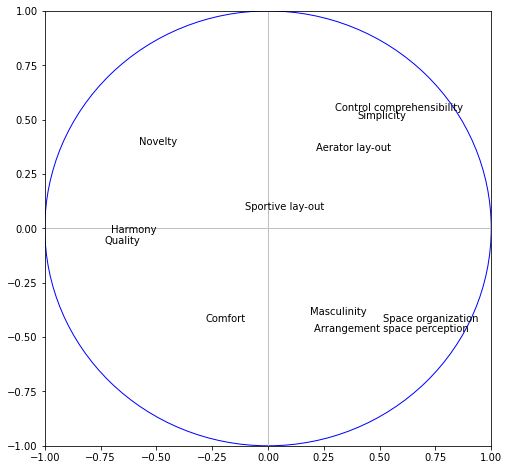

In [361]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [364]:
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_3':cos2var[:,3],'COS2_4':cos2var[:,4]}))

                              id    COS2_3    COS2_4
0             Space organization  0.026118  0.205485
1      Control comprehensibility  0.337781  0.006596
2                Aerator lay-out  0.440506  0.027143
3   Arrangement space perception  0.033110  0.446218
4                        Comfort  0.059429  0.121016
5                     Simplicity  0.034665  0.009701
6               Sportive lay-out  0.113601  0.001248
7                    Masculinity  0.068281  0.008802
8                        Quality  0.002134  0.108472
9                        Novelty  0.053510  0.000008
10                       Harmony  0.056736  0.071377


In [367]:
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigenvalues[k]

print(pd.DataFrame({'id':X.columns,'CTR_3':ctrvar[:,3],'CTR_4':ctrvar[:,4]}))

                              id     CTR_3     CTR_4
0             Space organization  0.017380  0.203015
1      Control comprehensibility  0.224774  0.006517
2                Aerator lay-out  0.293132  0.026817
3   Arrangement space perception  0.022033  0.440854
4                        Comfort  0.039547  0.119562
5                     Simplicity  0.023067  0.009584
6               Sportive lay-out  0.075595  0.001233
7                    Masculinity  0.045437  0.008696
8                        Quality  0.001420  0.107168
9                        Novelty  0.035608  0.000007
10                       Harmony  0.037754  0.070519


In [378]:
Xquali = pd.read_excel("./excel_data/dashboard_data.xlsx",sheet_name=0,header=0,index_col=0)
print(Xquali.shape)

(110, 19)


In [379]:
print(Xquali.columns)

Index(['Speedometer Dial position', 'Display lay-out',
       'Air conditioner control', 'Air vent shape', 'Dashboard color',
       'Aerator Shape', 'Arrangement space', 'Style lay-out',
       'Space organization', 'Control comprehensibility', 'Aerator lay-out',
       'Arrangement space perception', 'Comfort', 'Simplicity',
       'Sportive lay-out', 'Masculinity', 'Quality', 'Novelty', 'Harmony'],
      dtype='object')


In [380]:
Xquali.drop(['Space organization', 'Control comprehensibility', 'Aerator lay-out','Arrangement space perception', 'Comfort', 'Simplicity','Sportive lay-out', 'Masculinity', 'Quality', 'Novelty', 'Harmony'], inplace=True ,axis=1)
print(Xquali.shape)

(110, 8)


In [381]:
print(Xquali.head())

               Speedometer Dial position Display lay-out  \
Dashboards                                                 
AUDI A2            behind steering wheel        analogue   
CITROEN C2         behind steering wheel         digital   
FIAT Idea                  at the center        analogue   
LANCIA Ypsilon             at the center        analogue   
NISSAN Micra       behind steering wheel        analogue   

               Air conditioner control Air vent shape Dashboard color  \
Dashboards                                                              
AUDI A2                         button         square   signle colour   
CITROEN C2                       other        rounded   signle colour   
FIAT Idea                        other         square     two colours   
LANCIA Ypsilon                   other         square     two colours   
NISSAN Micra                    button        rounded   signle colour   

               Aerator Shape Arrangement space   Style lay-out  
Da

In [391]:
arrangement = np.unique(Xquali['Arrangement space'])

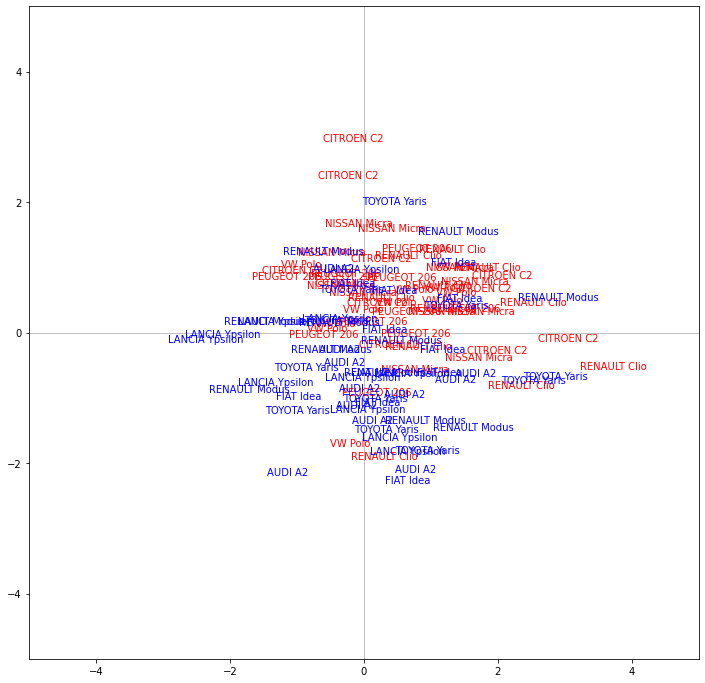

In [392]:
#liste des couleurs
couleurs = ['r','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)

#pour chaque modalité de la var. illustrative
for c in range(len(arrangement)):
    #numéro des individus concernés
    numero = np.where(Xquali == arrangement[c])
    
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,3],coord[i,4]),color=couleurs[c])

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [396]:
#structure intermédiaire
df = pd.DataFrame({'arrangement':Xquali['Arrangement space'],'3':coord[:,3],'4':coord[:,4]})
#puis calculer les moyennes conditionnelles
barycentre = df.pivot_table(index='arrangement',values=['3','4'],aggfunc=pd.Series.mean)
print(barycentre)

                    3         4
arrangement                    
few          0.246611  0.460601
many        -0.246611 -0.460601


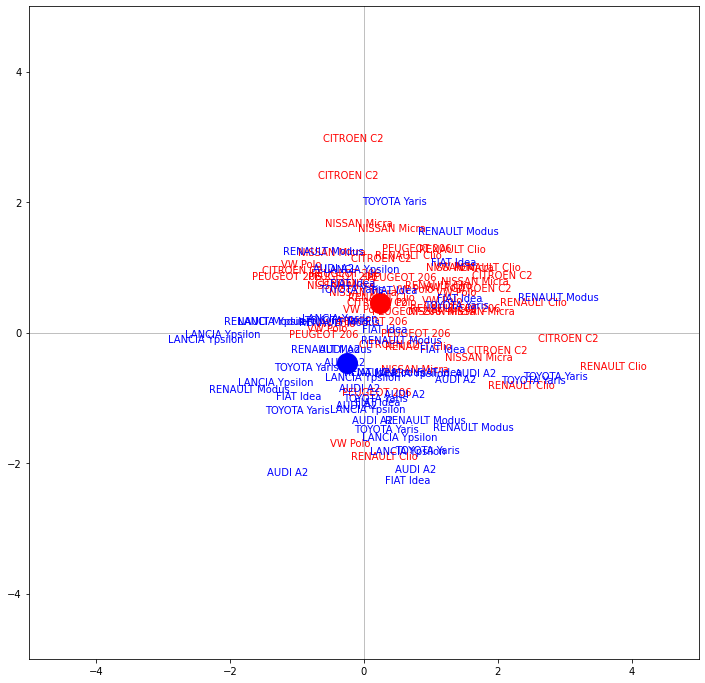

In [409]:
#liste des couleurs
couleurs = ['r','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)

#pour chaque modalité de la var. illustrative
for c in range(len(arrangement)):
    #numéro des individus concernés
    numero = np.where(Xquali == arrangement[c])
    
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,3],coord[i,4]),color=couleurs[c])

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#ajouter les barycentres
plt.plot([barycentre.iloc[0,0]],[barycentre.iloc[0,1]], 'ro', ms=20)
plt.plot([barycentre.iloc[1,0]],[barycentre.iloc[1,1]], 'bo', ms=20)

#affichage
plt.show()